# AuNR DA Figure S2

In [1]:
import sys
# add path for my packages
sys.path.append('C:\\Users\\katsuya2\\OneDrive - University of Illinois - Urbana\\Documents\\Python Scripts\\my_packages')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob

%precision 3
%matplotlib inline

# use my matplotlib style
style_p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/my_packages")
plt.style.use(Path(style_p, 'my_rc_setting.mplstyle'))

In [2]:
p_data = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/projects/AuNR_DA/datasets")

# define testing data from actual experiments
exp_ito_data = pd.read_csv(Path(p_data, '100323_ZJ_exp_ito_final.csv'))
exp_ito_data = exp_ito_data.drop(47)
exp_ito_data = exp_ito_data.reset_index(drop=True)

exp_ito_data = exp_ito_data[(exp_ito_data['length'] > 75) & (exp_ito_data['length'] < 100)] 
exp_ito_data = exp_ito_data[(exp_ito_data['width'] > 27) & (exp_ito_data['width'] < 32)] 
exp_ito_data = exp_ito_data.reset_index(drop=True)
print(exp_ito_data.shape)

# exp_glass_data = pd.read_csv(Path(p_data, '100323_ZJ_exp_glass_final.csv'))
# # particles on glass outliers particles 47, 67, 71
# outliers_particles = [47, 67, 71]
# exp_glass_data = exp_glass_data.drop(outliers_particles)
# # exp_glass_data = exp_glass_data.sample(n=117, random_state=42)
# exp_glass_data.reset_index(drop=True, inplace=True)
# print(exp_glass_data.shape)


glass_corr_data1 = pd.read_csv(Path(p_data, '052323_zhenyang_corr_data.csv'))
print(glass_corr_data1.shape)

glass_corr_data2 = pd.read_csv(Path(p_data, '060123_zhenyang_corr_data.csv'))
print(glass_corr_data2.shape)

glass_corr_data3 = pd.read_csv(Path(p_data, '061523_zhenyang_corr_data.csv'))
print(glass_corr_data3.shape)

glass_corr_data4 = pd.read_csv(Path(p_data, '071023_zhenyang_corr_data.csv'))
print(glass_corr_data4.shape)

glass_corr_data_combined = pd.concat([glass_corr_data1, glass_corr_data2, glass_corr_data3, glass_corr_data4], axis=0, ignore_index=True)
print(glass_corr_data_combined.shape)

(106, 11)
(33, 15)
(16, 15)
(25, 15)
(43, 15)
(117, 15)


In [3]:
ECI = pd.read_csv(Path(p_data, 'ECI_ITO.csv'))
glass = pd.read_csv(Path(p_data, '100623_ECI_ITO_glass.csv'))

print(ECI[(ECI['Wavelength'] > 400) & (ECI['Wavelength'] < 1000)]['n'].mean())
print(ECI[(ECI['Wavelength'] > 400) & (ECI['Wavelength'] < 1000)]['k'].mean())

ECI['eV'] = 1240 / ECI['Wavelength']
glass['eV'] = 1240 / glass['Wavelength']
ECI.head()

1.9841242440944882
0.006554380577427821


,Wavelength,n,k,eV
0,193.787445,2.176239,0.681645,6.398763
1,195.369293,2.177690,0.669472,6.346954
2,196.951202,2.178717,0.657821,6.295976
3,198.533112,2.179358,0.646697,6.245810
4,200.115082,2.179650,0.636106,6.196435


In [4]:
al2o3_data = pd.read_csv(Path(p_data, 'al2o3.csv'))
al2o3_data['wav'] = al2o3_data['wav']*10e2
al2o3_data['eV'] = 1240 / al2o3_data['wav']

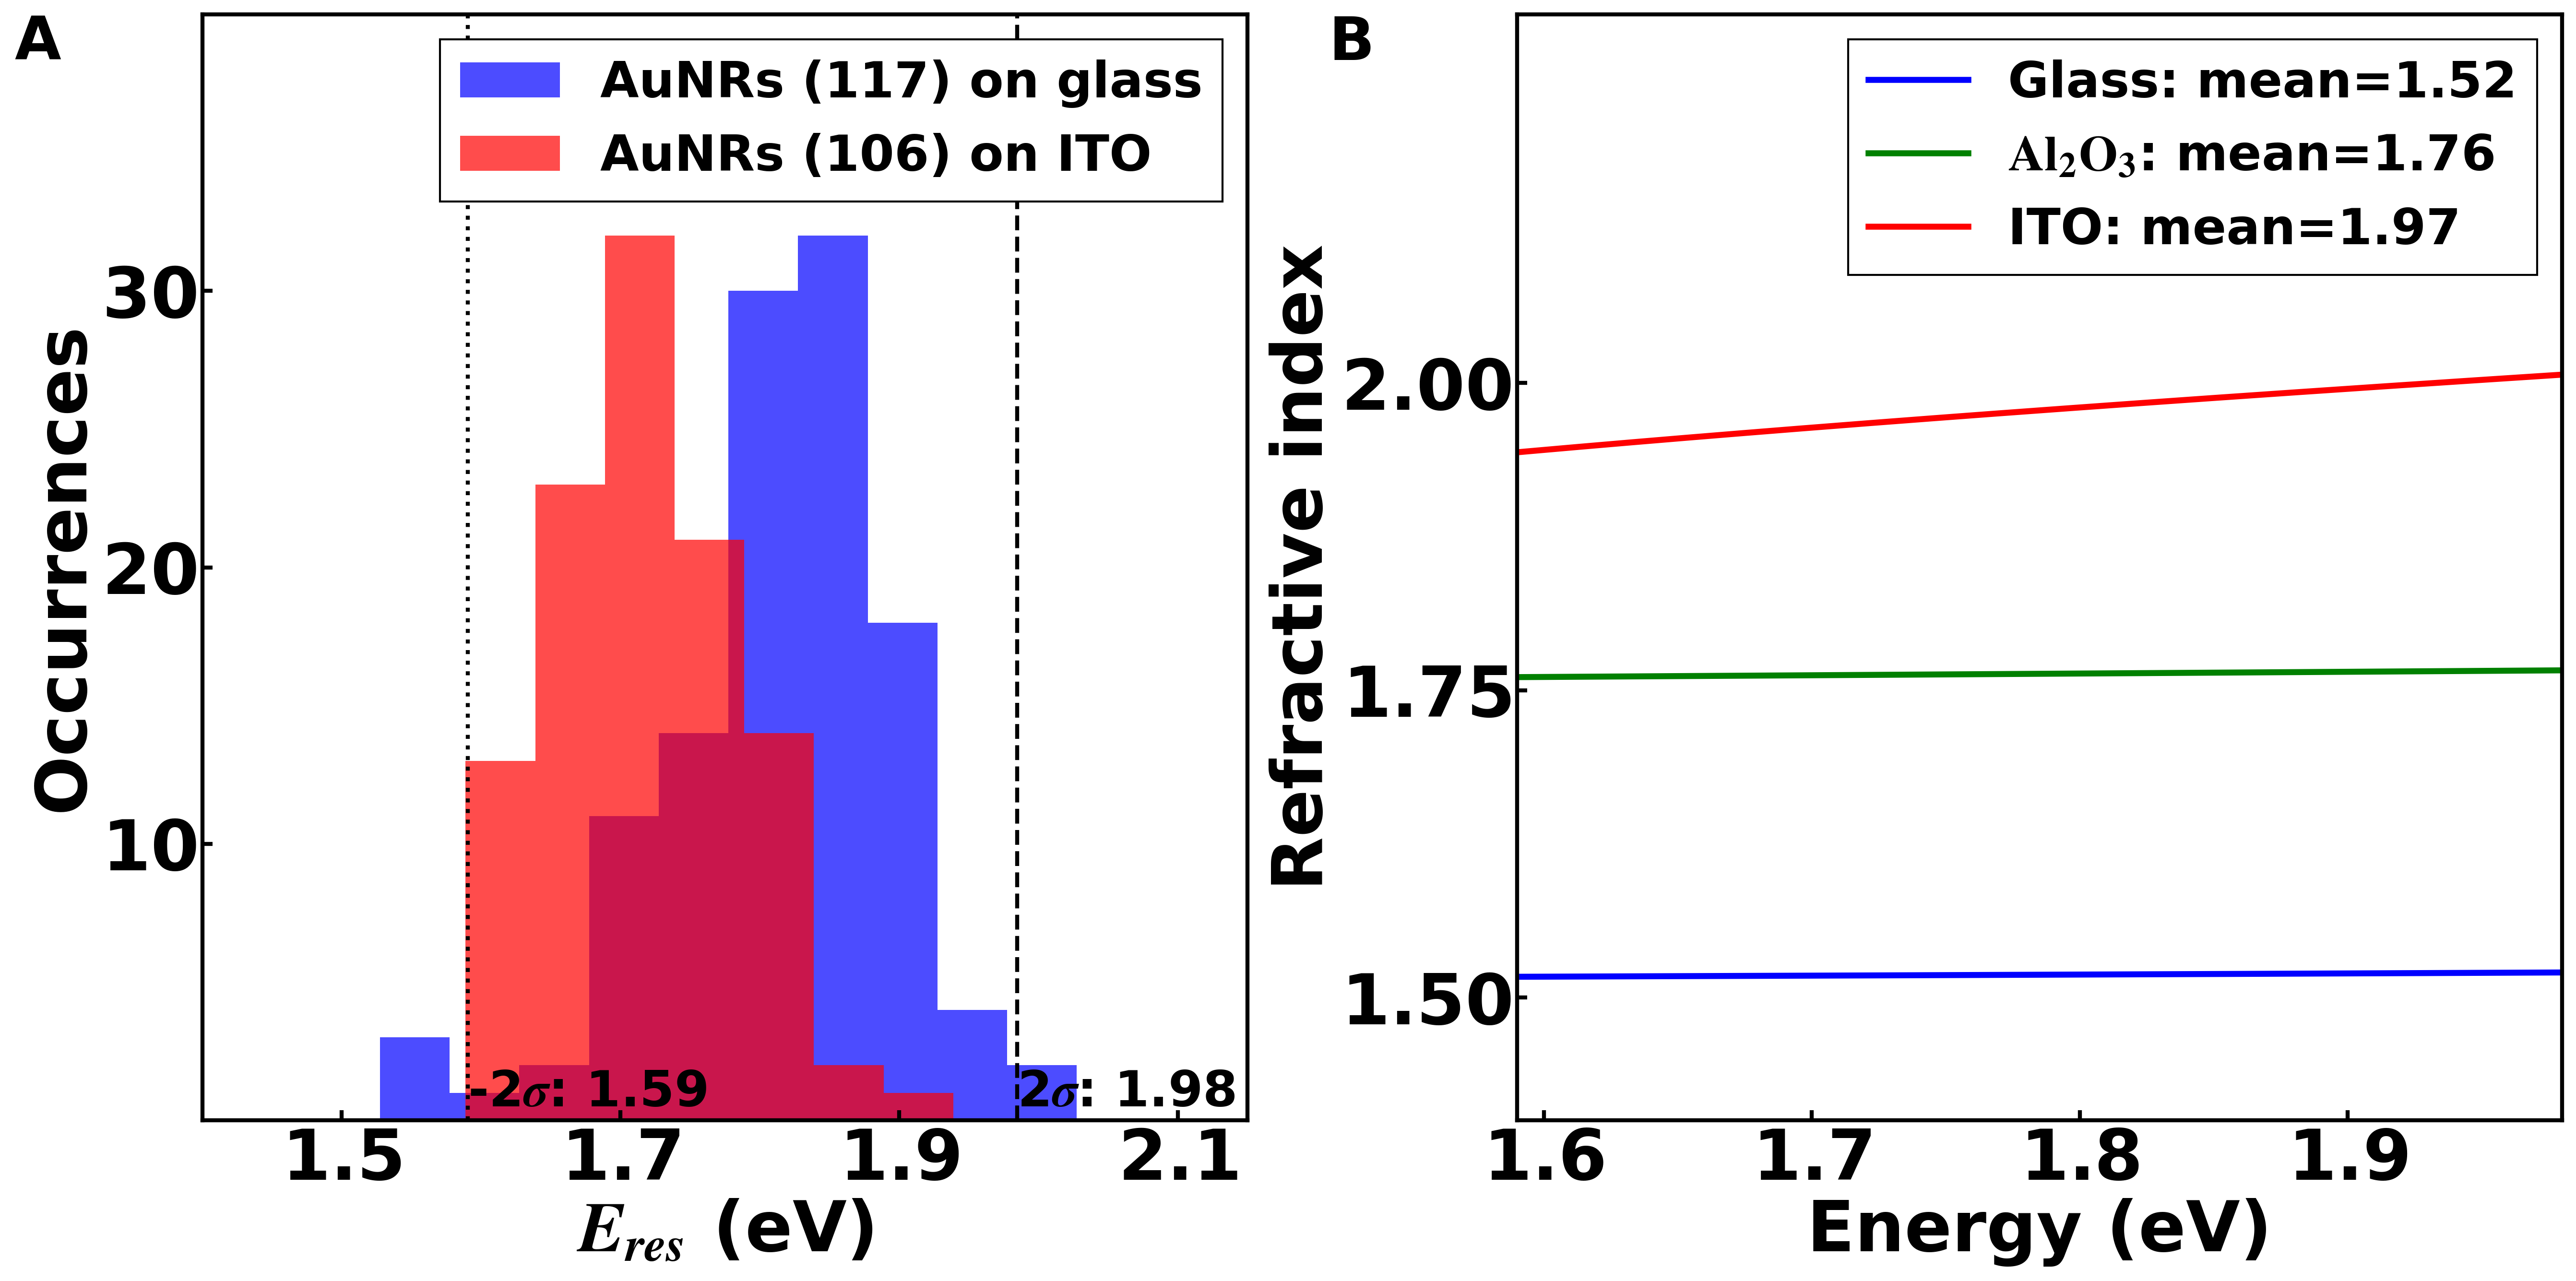

In [21]:
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(18, 9), dpi=300)

binwidth = 0.05
ylim = 40
target = glass_corr_data_combined['Exp_eres']
target_avg = target.mean()
target_std = target.std()
ax1.vlines(target_std*2 + target_avg, 0, ylim, color='k', ls='dashed', lw=2)
ax1.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), color='blue', alpha=0.7, label=f'AuNRs ({len(target)}) on glass')

target2 = exp_ito_data['eres']
target2_avg = target2.mean()
target2_std = target2.std()

ax1.vlines(-target2_std*2 + target2_avg, 0, ylim, color='k', ls='dotted', lw=2)
ax1.hist(target2, bins=np.arange(min(target2), max(target2)+binwidth, binwidth), color='red', alpha=0.7, label=f'AuNRs ({len(target2)}) on ITO')

ax1.text(-target2_std*2 + target2_avg, 0.5, f'-2$\sigma$: {round(-target2_std*2 + target2_avg, 2)}', fontsize=25)
ax1.text(target_std*2 + target_avg, 0.5, f'2$\sigma$: {round(target_std*2 + target_avg, 2)}', fontsize=25)

ax1.set_xlabel('$E_{res}$ (eV)', fontsize=35)
ax1.set_ylabel('Occurrences', fontsize=35)
ax1.set_ylim(0, 40)
ax1.set_xlim(1.4, 2.15)
ax1.set_xticks([1.5, 1.7, 1.9, 2.1])
ax1.set_yticks([10, 20, 30])
ax1.tick_params(axis='both', labelsize=35, pad=3)
ax1.legend(loc='upper right', fontsize=25)
ax1.text(-0.18, 1, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)

ene_low = round(-target2_std*2 + target2_avg, 2)
ene_high = round(target_std*2 + target_avg, 2)

ECI_ITO_nmean = ECI[(ECI['eV'] > ene_low) & (ECI['eV'] < ene_high)]['n'].mean()
glass_ITO_nmean = glass[(glass['eV'] > ene_low) & (glass['eV'] < ene_high)]['n'].mean()
al2o3_nmean = al2o3_data[(al2o3_data['eV'] > ene_low) & (al2o3_data['eV'] < ene_high)]['n'].mean()

ax2.plot(glass['eV'], glass['n'], c='b', lw=3, label=f"Glass: mean={round(glass_ITO_nmean, 2)}")
ax2.plot(al2o3_data["eV"], al2o3_data["n"], c='g', lw=3, label=f"$\\mathrm{{Al_2O_3}}$: mean={round(al2o3_nmean, 2)}")
ax2.plot(ECI['eV'], ECI['n'], c='r', lw=3, label=f"ITO: mean={round(ECI_ITO_nmean, 2)}")
ax2.set_xlabel("Energy (eV)", fontsize=35)
ax2.set_ylabel("Refractive index", fontsize=35)
ax2.set_xlim(ene_low, ene_high)
ax2.set_xticks([1.6, 1.7, 1.8, 1.9])
ax2.set_yticks([1.5, 1.75, 2.0])
ax2.tick_params(axis='both', labelsize=35, pad=3)
ax2.set_ylim(1.4, 2.3)
ax2.legend(loc='upper right', fontsize=25)
ax2.text(-0.18, 1, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)

plt.subplots_adjust(hspace=0)  # Remove the space between plots
# Save the figure
plt.savefig("AuNR_DA_figureS2.png", dpi=300, bbox_inches='tight')

In [16]:
print(ene_low, ene_high)

1.59 1.98
